In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plot

In [2]:
# Read the dataset
series=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\New data\range for 5 Pressure.xlsx')
#index_col ='Time', parse_dates = True

# Print the first five rows of the dataset
series.head()

,Time,Pressure
0,12:30:17,5.004
1,12:30:18,5.009
2,12:30:19,5.011
3,12:30:20,5.012
4,12:30:21,5.015


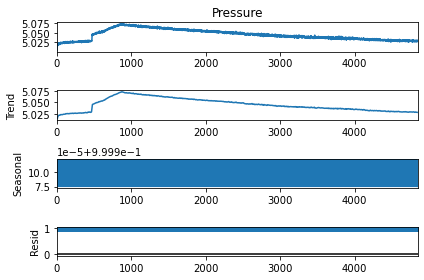

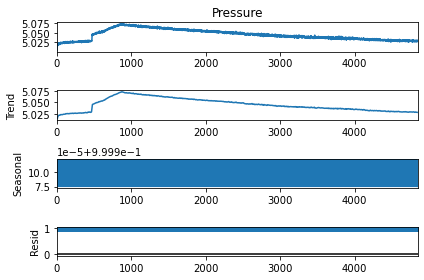

In [3]:
result = seasonal_decompose(series['Pressure'], model='multiplicable', period=12)

result.plot()

In [4]:
"""from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(series['Pressure'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()"""

'from pmdarima import auto_arima\n  \n# Ignore harmless warnings\nimport warnings\nwarnings.filterwarnings("ignore")\n  \n# Fit auto_arima function to AirPassengers dataset\nstepwise_fit = auto_arima(series[\'Pressure\'], start_p = 1, start_q = 1,\n                          max_p = 3, max_q = 3, m = 12,\n                          start_P = 0, seasonal = True,\n                          d = None, D = 1, trace = True,\n                          error_action =\'ignore\',   # we don\'t want to know if an order does not work\n                          suppress_warnings = True,  # we don\'t want convergence warnings\n                          stepwise = True)           # set to stepwise\n  \n# To print the summary\nstepwise_fit.summary()'

In [5]:
#X = series.values
#train, test = X[1:len(X)-3000], X[len(X)-3000:]

In [6]:
# Split data into train / test sets
train = series.iloc[:len(series)-3000]
test = series.iloc[len(series)-3000:] # set 3000 for testing

# Fit a SARIMAX(0, 1, 2)x(1, 1, 2, 12)(1, 1, 2, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Pressure'], 
                order = (0, 1, 2), 
                seasonal_order =(1, 1, 2, 12))

result = model.fit()
result.summary()


C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Pressure   No. Observations:                 1849
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood                9523.199
Date:                            Sat, 02 Jul 2022   AIC                         -19034.398
Time:                                    15:38:17   BIC                         -19001.306
Sample:                                         0   HQIC                        -19022.194
                                           - 1849                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7373      0.011    -68.521      0.000      -0.758      -0.716
ma.L2          0.0079      0.013      0.598      0.550      -0.018       0.034
ar.S.L12      -0.5141      0.259     -1.982      0.047      -1.023      -0.006
ma.S.L12      -0.3985      0.268     -1.484      0.138      -0.925       0.128
ma.S.L24      -0.3809      0.234     -1.625      0.104      -0.840       0.079
sigma2        1.8e-06   2.78e-08     64.636      0.000    1.75e-06    1.85e-06
===================================================================================
Ljung-Box (L1) (Q):                   7.21   Jarque-Bera (JB):             13182.14
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

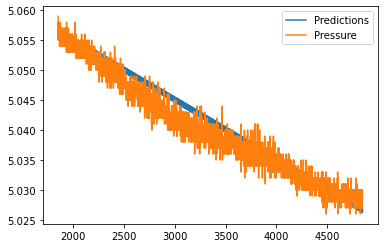

In [7]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Pressure'].plot(legend = True)

In [8]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [9]:
# Calculate root mean squared error
rmse(test["Pressure"], predictions)

0.002265941365780023

In [10]:
# Calculate mean squared error
mean_squared_error(test["Pressure"], predictions)

5.1344902731530355e-06

# Forecast using ARIMA Model

<AxesSubplot:>

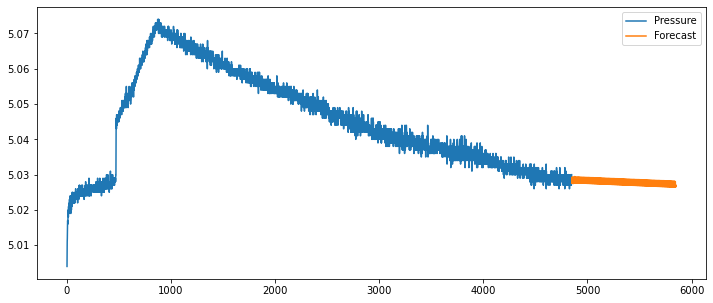

In [11]:
# Train the model on the full dataset
model = model = SARIMAX(series['Pressure'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(series), 
                          end = (len(series)-1) + 1000, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
series['Pressure'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [12]:
print(forecast)

4849    5.028067
4850    5.028810
4851    5.027523
4852    5.028013
4853    5.029251
          ...   
5844    5.028036
5845    5.026632
5846    5.027194
5847    5.026471
5848    5.026748
Name: Forecast, Length: 1000, dtype: float64


In [13]:
#pip install plotly==2.7.0

In [14]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [15]:
time_series_df=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\New data\range for 5 Pressure.xlsx',
                       index_col ='Time',
                       parse_dates = True)
time_series_df.head()

,Pressure
Time,
2022-07-02 12:30:17,5.004
2022-07-02 12:30:18,5.009
2022-07-02 12:30:19,5.011
2022-07-02 12:30:20,5.012
2022-07-02 12:30:21,5.015


In [16]:
actual_vals = time_series_df.values
actual_log = np.log10(actual_vals)

In [17]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls

X = time_series_df.values
train, test = X[1:len(X)-3000], X[len(X)-3000:]

train_log, test_log = np.log10(train), np.log10(test)

my_order = (0, 1, 1)
my_seasonal_order = (2, 1, 1, 12)

In [18]:
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
   # print('predicted=%f, expected=%f' % (output[0], obs))
#error = math.sqrt(mean_squared_error(test_log, predict_log))
#print('Test rmse: %.3f' % error)
# plot
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

"history = [x for x in train_log]\npredictions = list()\npredict_log=list()\nfor t in range(len(test_log)):\n    model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)\n    model_fit = model.fit(disp=0)\n    output = model_fit.forecast()\n    predict_log.append(output[0])\n    yhat = 10**output[0]\n    predictions.append(yhat)\n    obs = test_log[t]\n    history.append(obs)\n   # print('predicted=%f, expected=%f' % (output[0], obs))\n#error = math.sqrt(mean_squared_error(test_log, predict_log))\n#print('Test rmse: %.3f' % error)\n# plot\nfigsize=(12, 7)\nplt.figure(figsize=figsize)\npyplot.plot(test,label='Actuals')\npyplot.plot(predictions, color='red',label='Predicted')\npyplot.legend(loc='upper right')\npyplot.show()"